<a href="https://colab.research.google.com/github/deepu718/tensorflow_practice/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with tensorflow

In this notebook we're going to learn how to write neural networks for classification

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
  * Binary classification
  * Multicalss classification
  * Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create Circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


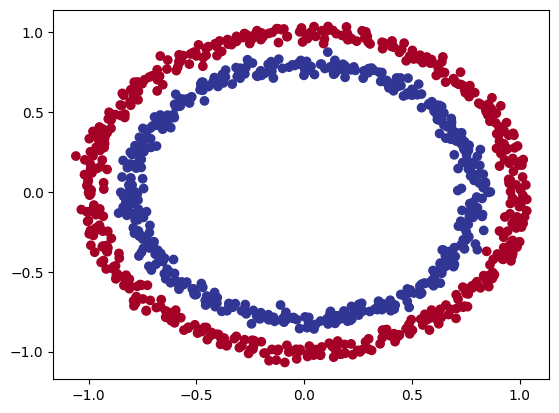

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [6]:
# Input and output shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modeling

In [7]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [8]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.1950 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 2.7644 - accuracy: 0.4920
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7509 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7104 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.4890


In [9]:
# Let's try and improve our model by training for longer..
model.fit(X,y,epochs=200,verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classifiction problem and our model is getting around 50% accuracy its performing as if it's guessing.

lets add an extra layer.

In [10]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [11]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improving our model

In [12]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [13]:
# evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.5110


[0.6966967582702637, 0.5109999775886536]

to visualize our model's predictions , let's create a function `plot_decision_boundary`, this function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* plot the predictions as well as ine between zone (where each unique class falls)

In [15]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  plots the decision created by a model prediction on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() -0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,0].min() -0.1, X[:,0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


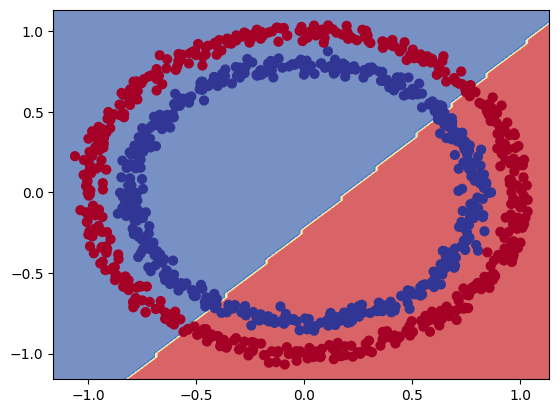

In [16]:
# Check out the predictions our model are making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [25]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)
# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [26]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(None,1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100,verbose=0)

2/2 [==============================] - 0s 6ms/step


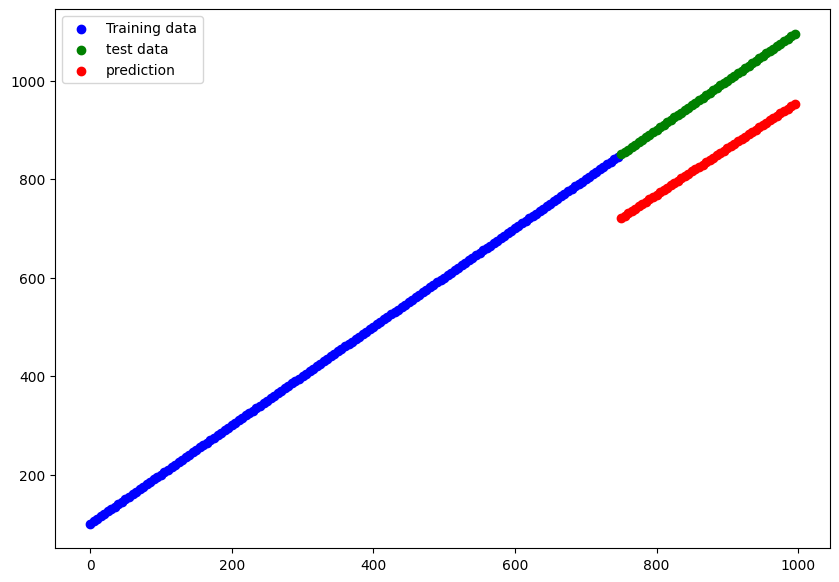

In [32]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test,axis=-1))

# plot the model
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b', label="Training data")
plt.scatter(X_reg_test,y_reg_test,c='g', label="test data")
plt.scatter(X_reg_test,y_reg_preds,c='r', label="prediction")
plt.legend();

## The missing piece: Non Linearity